In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.set_random_seed(777)

In [84]:
td = tf.argmax([[5,1,4], 
                [4,5,6]], axis = 0) # 열 내에서 최대값의 인덱스, axis의 디폴트값 = 0
td2 = tf.argmax([[5,1,4], 
                [4,5,6]], axis = 1)
sess = tf.Session()
print(sess.run(td))
print(sess.run(td2))

[0 1 1]
[0 2]


In [85]:
x = np.arange(6).reshape(2,3)
# k = tf.reduce_sum(x) 
print(sess.run(tf.reduce_sum(x)))             # 행렬의 모든 요소를 합하는 함수
print(sess.run(tf.reduce_sum(x, axis = 0)))   # 열 단위 합
print(sess.run(tf.reduce_sum(x, axis = 1)))   # 행 단위 합

15
[3 5 7]
[ 3 12]


In [86]:
# cost : y(실제값) -yhat(예측값)의 제곱의 합의 평균
def costToYhat(y, yhat) :
    cost = 0
    for i in range(len(y)) :
        cost+=(y[i]-yhat[i])**2
    return cost/len(y)
    
y = [1,2,3]
yhat = [2,4,6]
print(costToYhat(y, yhat))

4.666666666666667


* * *

In [87]:
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55) # np.random.normal(평균, 표준편차)
    y1 = x1 * 0.1 + 0.03 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1,y1])
# print(vectors_set)
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]
# print(x_data)
# print(y_data)

#정규분포를 따르는 난수 생성 :  np.random.normal(size=5)

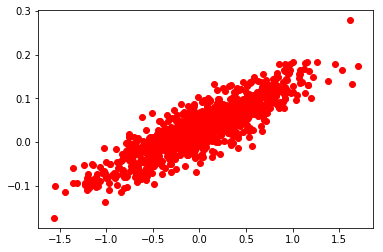

In [89]:
plt.plot(x_data, y_data, 'ro')
plt.show()

* * *

0 [0.00585386] [0.00322186]


No handles with labels found to put in legend.


0.004174864


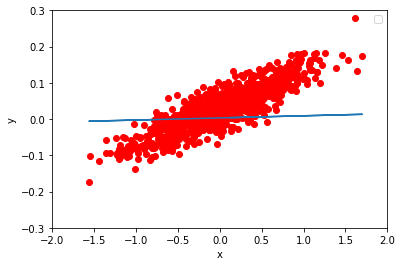

No handles with labels found to put in legend.


1 [0.00853386] [0.00611665]
0.0038742947


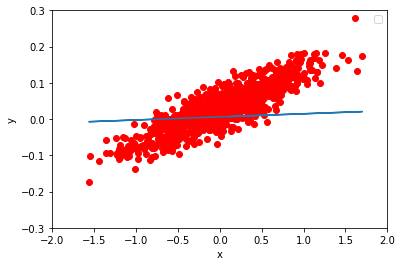

No handles with labels found to put in legend.


2 [0.01113333] [0.00871721]
0.0036127947


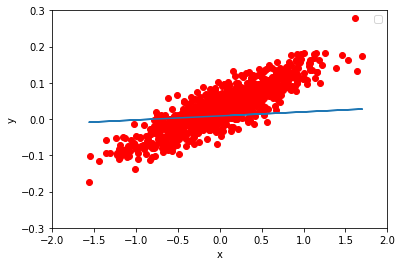

No handles with labels found to put in legend.


3 [0.01365504] [0.01105313]
0.003383939


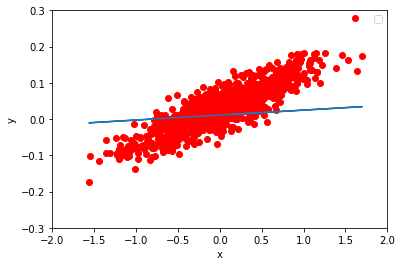

No handles with labels found to put in legend.


4 [0.01610165] [0.01315099]
0.003182467


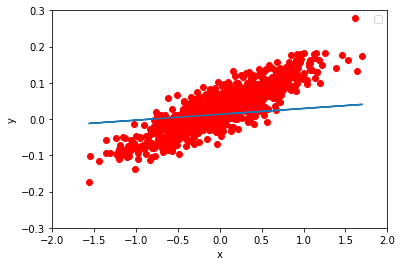

No handles with labels found to put in legend.


5 [0.0184757] [0.01503474]
0.003004068


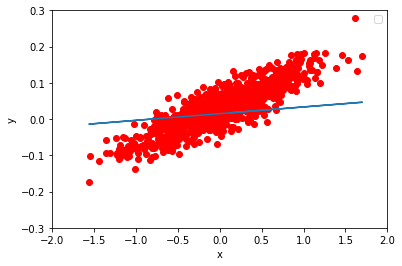

No handles with labels found to put in legend.


6 [0.02077961] [0.01672591]
0.0028451981


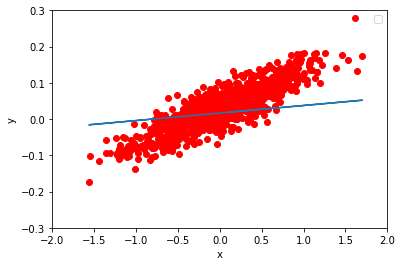

No handles with labels found to put in legend.


7 [0.02301569] [0.01824389]
0.0027029433


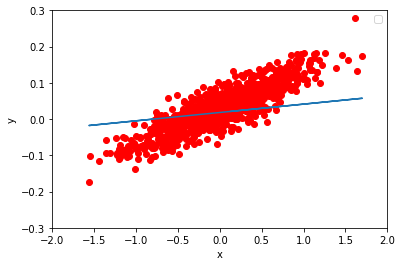

In [88]:
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # -1에서 1 사이의 난수 1개가 발생(난수 1개를 발생시켜서 변수의 값으로 초기화하는 작업을 W라는 노드로 정의)
b = tf.Variable(tf.zeros(1))
hf = w * x_data + b # 가설함수(예측함수)
cost = tf.reduce_mean(tf.square(hf-y_data)) # tf.square : 예측값-실제값의 제곱, tf.reduce_mean : 합의 평균
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(8):
    sess.run(train)
    print(step, sess.run(w), sess.run(b))
    print(sess.run(cost))
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, sess.run(w) * x_data + sess.run(b))
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylabel('y')
    plt.ylim(-0.3, 0.3)
    plt.legend()
    plt.show()
#     if step%10 ==0:
#         print(sess.run(w), sess.run(b))
#         print(sess.run(cost))
#         print("=" * 50)

In [96]:

x_train = [1,2,3]
y_train = [1,2,3]

w = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.random_uniform([1]))
hf = w * x_train + b
cost = tf.reduce_mean(tf.square(hf-y_train))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001) :
    sess.run(train)
    if step%200 ==0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))
        print("=" * 50)

0 0.15745217 [0.73905325] [0.18714488]
200 0.0035057801 [0.9312316] [0.15632668]
400 0.0013386762 [0.95750535] [0.09660029]
600 0.00051117403 [0.9737409] [0.05969321]
800 0.00019519225 [0.98377347] [0.03688677]
1000 7.453521e-05 [0.98997283] [0.02279395]
1200 2.8460703e-05 [0.9938039] [0.01408522]
1400 1.0867891e-05 [0.9961712] [0.00870371]
1600 4.1495073e-06 [0.99763405] [0.00537837]
1800 1.5847272e-06 [0.9985379] [0.00332358]
2000 6.0515043e-07 [0.9990966] [0.00205388]


***

### feeding

In [100]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.set_random_seed(777)

w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32, shape = [None])
y = tf.placeholder(tf.float32, shape = [None])
hf = w * x + b
cost = tf.reduce_mean(tf.square(hf-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001) :
    sess.run(train, feed_dict={x: [1,2,3], y:[1,2,3]})
    if step%100 ==0:
        print(step, sess.run(cost, feed_dict={x: [1,2,3], y:[1,2,3]}))
        
print("===========모델 완성===========")
cv, wv, bv = sess.run([cost, w, b], feed_dict={x: [1,2,3], y:[1,2,3]})
print("비용 : ", cv, "\n가중치 : ", wv, "\n편향 : ", bv)

print("===========예측==============")
print("2.5일때 예상되는 값 : ", sess.run(hf, feed_dict={x:[2.5]}))
print("5일때 예상되는 값 : ", sess.run(hf, feed_dict={x:[5]}))
print("1.5일때 예상되는 값 : ", sess.run(hf, feed_dict={x:[1.5]}))

0 14.845524
100 0.03108042
200 0.01920582
300 0.011868027
400 0.0073337066
500 0.0045317924
600 0.0028003743
700 0.0017304615
800 0.001069312
900 0.0006607726
1000 0.00040831766
1100 0.00025231458
1200 0.00015591536
1300 9.6347554e-05
1400 5.9535512e-05
1500 3.6789213e-05
1600 2.273362e-05
1700 1.4048458e-05
1800 8.681093e-06
1900 5.3643603e-06
2000 3.3146225e-06
===========모델 완성===========
비용 :  3.3146225e-06 
가중치 :  [0.99788547] 
편향 :  [0.00480691]
===========예측==============
2.5일때 예상되는 값 :  [2.4995208]
5일때 예상되는 값 :  [4.9942346]
1.5일때 예상되는 값 :  [1.5016351]
